##### A numerical feature is said to have nearly normal distribution if it is having atleast roughly bell shape PDF or PMF , but more explicitely we have to plot QQ-plot for that feature,which we will discuss later
#### normal distribution(also called as normal deviate) is special kind of distribution which is most commonly found in the nature , can have any real number as data point , has special use by converting to standard normal distribution(also called as standard normal deviate)
#### it follows empirical rule of 68-95-99.7%tile data
#### the perfect normal distribution follows formula y=f(x)=P(X<=x)=(1/root(2*std.dev)) * exp(  -0.5 *  ( ( ( x-mean ) / std.dev ) ^2 )   ) and has exactly bell shaped curve symmetric about its line through mean data point,same formula for sample and population
#### it indicates probability of data points being less than or equal to data point x in the numerical feature
##### 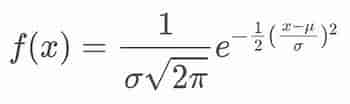
##### https://www.statology.org/example-of-normal-distribution/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
var=np.random.normal(10,20,100)
var

array([  9.61094051,  18.69441482,  36.84101433,  20.73874904,
       -20.1029897 , -34.91186456, -16.28637731,  -1.82407296,
         4.56771934,   0.97836673,  16.30575246, -24.32696445,
         2.41228454,  10.69746608, -24.2209613 ,   0.75122713,
        -9.8889453 ,  22.95050071,  20.6929307 ,   9.14443946,
         4.67587521,  10.6124395 ,  14.62499562,  -3.71744419,
        19.77911981,  13.34272734,   7.96763012,  -5.18320362,
        21.54483998,  12.6333395 ,  14.03182874,  29.73479638,
         1.64347085,   5.23460089, -23.20797898,  -6.05796351,
         6.62664582,  19.54377638,   9.2952491 ,  -0.83119633,
        13.66577815,  20.44806145,  59.29712646,   6.06788736,
        -9.70610612,  28.94099001,   1.43940043,  20.14622074,
        -2.9998908 ,  21.79224006,  10.30355897,   4.15520269,
        11.80008232,  11.22177719,  22.8527292 , -17.98328308,
        23.43496915,   9.80564424,  -1.74172109, -13.35074478,
       -21.28673629, -15.18487647,  40.40607824, -14.56

##### bandwidth and etc parameters can be altered on the wish of data scientist

<Axes: ylabel='Density'>

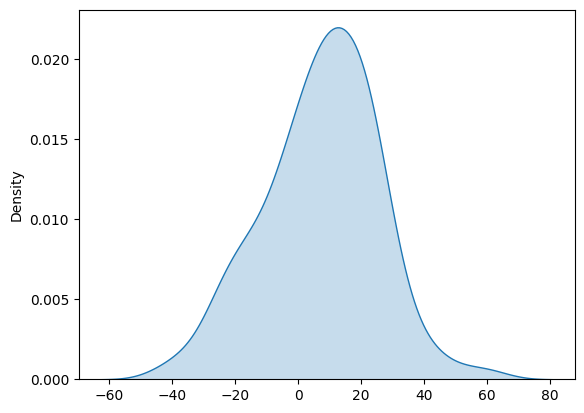

In [3]:
sns.kdeplot(var,bw_adjust=1,fill='g')

##### now this curve looks like bell curve almost roughly for sure , so we can treat it as normal distribution

##### but still matter of the fact is that it is not exactly normal distribution and its all data points do not  fit exactly on normal distribution formula, so we need to convert it to standard normal distribution by z-score standardization method

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scvar=sc.fit_transform(var.reshape(-1,1))
#this reshaping was done as array var is just one numerical feature , actually it was compulsory else it was giving error , no more information on it

##### see the diffirence between PDF or PMF of var and scvar due to standardization

<Axes: ylabel='Density'>

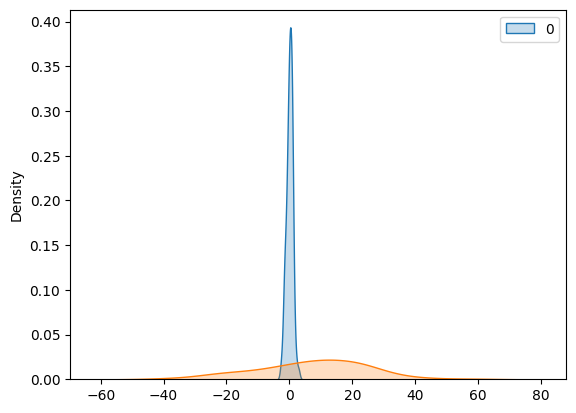

In [5]:
sns.kdeplot(scvar,fill='g')
sns.kdeplot(var,fill='m')

<Axes: ylabel='Density'>

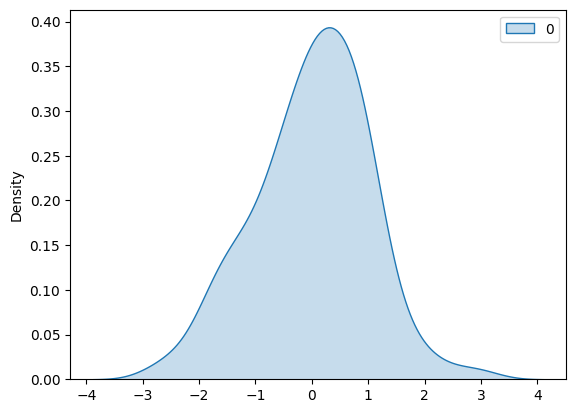

In [6]:
sns.kdeplot(scvar,fill='g')

##### Standard Normal Distribution (also known as Gaussian Distribution) is special kind of normal distribution having mean=0 , and stddeviation=1 in its PDF or PMF, and now these standardized data points (called as z-scores of original data points) are available with us and they  have two main applications : 
##### 1]  treating original data points as outliers which have z-score < -3 or z-score > 3
##### 2] calculating probability P( X <= x ) of original data point x by using its z-score and negative or positive z-score table
##### 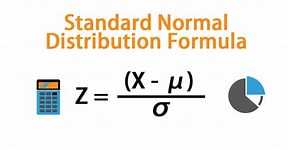

In [7]:
scvar.mean()# very very nearly or approximately 0

-6.772360450213455e-17

In [8]:
scvar.std()# very very nearly or approximately or exactly 1

1.0

In [22]:
df=pd.DataFrame(pd.Series(var),columns=['var'])
scdf=pd.DataFrame(scvar.reshape(100,1),columns=['scvar'])
ndf=pd.concat((df,scdf),axis=1)
ndf.head()
# total 100 rows are here for this example

,var,scvar
0,9.610941,0.137251
1,18.694415,0.644047
2,36.841014,1.656504
3,20.738749,0.758107
4,-20.102990,-1.520584


##### above first column is original variable , and second column contains its z-scores by standardization
##### 1] detecting outliers for say z-score > 2 or z-score < -2 for only this example

In [40]:
a=ndf['var']
b=ndf['scvar']
for i in range(0,100):
    if(b[i]>2 or b[i]<-2):
        print('row no. :',i,'data point :',a[i])

row no. : 5 data point : -34.91186456460588
row no. : 42 data point : 59.29712646354311
row no. : 83 data point : -28.73522256747495
row no. : 89 data point : -41.06815403611112
row no. : 91 data point : 46.83461946674698


##### 2] calculating probabilty densities

In [31]:
import scipy.stats as st
def zscore(x,mean,std):
    return ((x-mean)/std)
print('the percentile of data points below ',var[10],' is ',st.norm.cdf(zscore(var[10],var.mean(),var.std())*100))

the percentile of data points below  16.30575246171867  is  1.0


In [33]:
print('the zscore of the data point above 65.87%tile of data points is',st.norm.ppf(0.6587))

the zscore of the data point above 65.87%tile of data points is 0.4089177806033158


##### we cannot write so exact code for getting exact data point having this z-score value , we need to do manual lookup into DataFrame , this happens due to 15-digit floating point precision as any datapoint's zscore's all 15 digits will rarely match above found zscore, only first two or three digits may match, which need to looked up by us only